In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")

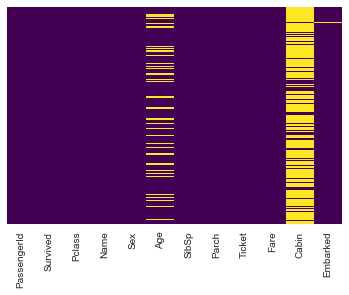

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
train.shape

(891, 12)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


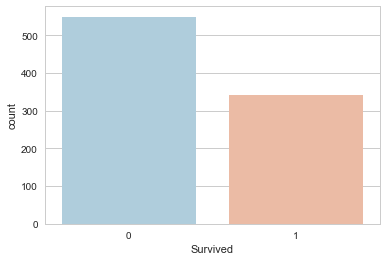

In [8]:
sns.set_style('whitegrid')
sns.countplot(x=train['Survived'],palette="RdBu_r")

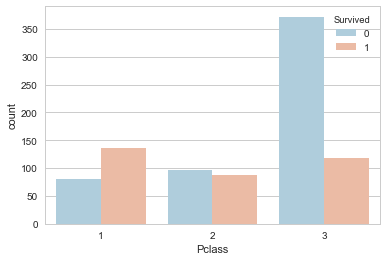

In [9]:
sns.countplot(hue=train['Survived'],x=train['Pclass'], palette="RdBu_r")

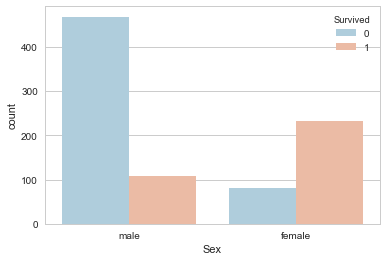

In [10]:
sns.countplot(hue=train['Survived'], x=train['Sex'], palette="RdBu_r")

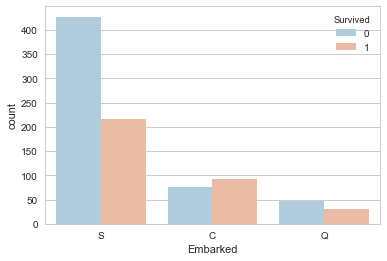

In [11]:
sns.countplot(hue=train['Survived'], x=train['Embarked'], palette="RdBu_r")

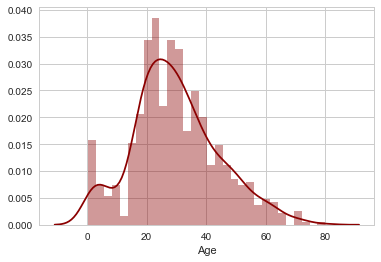

In [12]:
sns.distplot(train['Age'].dropna(),bins=30, color="DarkRed")

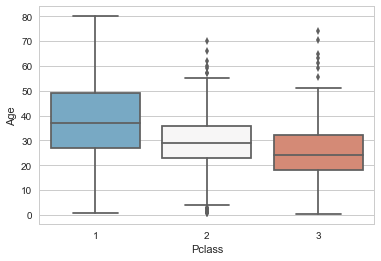

In [13]:
sns.boxplot(x=train['Pclass'], y=train['Age'],palette='RdBu_r')

In [14]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
def impute_age(cols):
    Pclass = cols[0]
    Age = cols[1]
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38.233
        elif Pclass == 2:
            return 29.877
        else:
            return 25.140
    else:
        return Age;

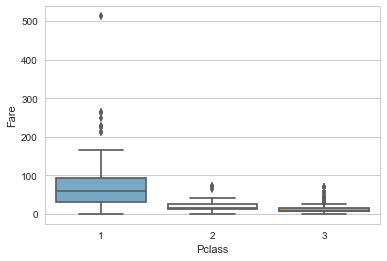

In [76]:
sns.boxplot(x=train['Pclass'], y=train['Fare'],palette='RdBu_r')

In [75]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [79]:
def impute_fare(cols):
    Pclass = cols[0]
    fare = cols[1]
    if pd.isnull(fare):
        
        if Pclass == 1:
            return 84.154
        elif Pclass == 2:
            return 20.662
        else:
            return 13.675
    else:
        return fare;

In [16]:
train['Age']=train[["Pclass", "Age"]].apply(impute_age, axis=1)
train.drop('Cabin', axis=1, inplace=True)

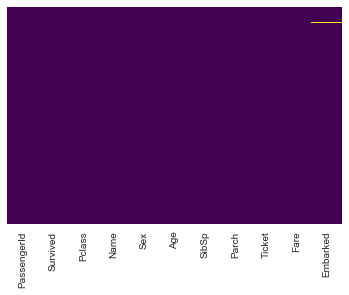

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

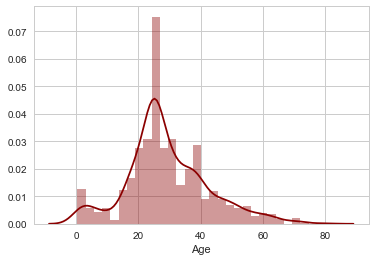

In [18]:
sns.distplot(train['Age'].dropna(),bins=30, color="DarkRed")

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [20]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [21]:
train.drop('Sex', axis=1, inplace=True)
train.drop('Embarked', axis=1, inplace=True)

In [22]:
train = pd.concat([train, sex, embarked], axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [24]:
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = train['Survived']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logModel = LogisticRegression()

In [30]:
logModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = logModel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [33]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268



In [34]:
metrics.confusion_matrix(y_test, y_pred)

array([[133,  21],
       [ 40,  74]])

In [84]:
test = pd.read_csv('test.csv')

In [85]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


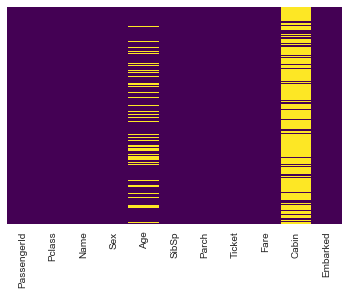

In [86]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [87]:
test['Age']=test[["Pclass", "Age"]].apply(impute_age, axis=1)
test.drop('Cabin', axis=1, inplace=True)

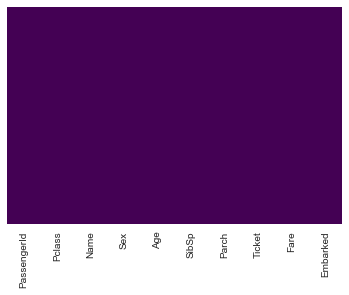

In [88]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [89]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embarked = pd.get_dummies(test['Embarked'], drop_first=True)

In [90]:
test.drop('Sex', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

In [91]:
test = pd.concat([test, sex, embarked], axis=1)

In [92]:
test['Fare']=test[["Pclass", "Fare"]].apply(impute_fare, axis=1)

In [93]:
X = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [95]:
test[test['PassengerId']==1044]

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
152,1044,3,"Storey, Mr. Thomas",60.5,0,0,3701,13.675,1,0,1


In [96]:
predictions = logModel.predict(X)

In [97]:
output = pd.DataFrame(columns=['PassengerId', 'Survived'])

In [98]:
output['PassengerId'] = test['PassengerId']
output['Survived'] = predictions

In [99]:
output.to_csv('output.csv')